<a href="https://colab.research.google.com/github/hinda-mt/hinda-mt/blob/main/csv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#After importing the dataset using Pandas, start by showing the head of the dataset then some general information about the data columns and values.

df= pd.read_csv('titanic-passengers.csv',sep=";")

In [ ]:
df.shape 

(891, 12)

In [ ]:
df.dtypes 

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
df.describe(include='all')
# according to count age (714/891) ARE MISSING FOR NUMERICA VAUES
# according to count Cabin (204/891) ARE MISSING FOR CATEGORICA VAUES
# according to count Embarked (889/881) ARE MISSING FOR CATEGORICA VAUES

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,No,NaN,"Newell, Miss. Marjorie",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,549,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# seperate the data into numeric and categorical
# Specify the features of interest
df_num = df[['Age','SibSp','Parch','Fare']]
df_cat = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

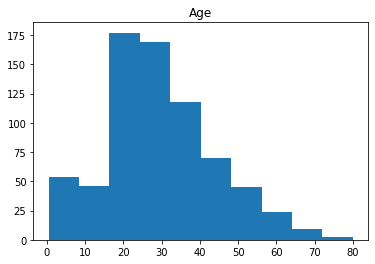

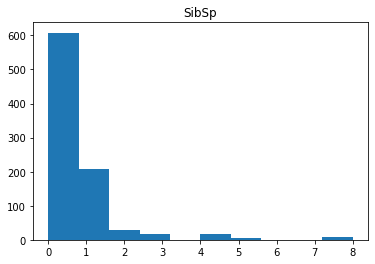

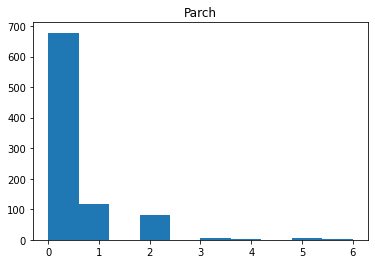

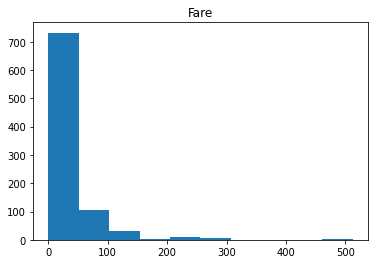

In [ ]:
#Now let’s make plots of the numeric data:
# draw histograms
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()
#So as you can see, most of the distributions are scattered, 
#except Age, it’s pretty normalized. We might consider normalizing them later on. Next, we plot a correlation heatmap between the numeric columns:
#From the histogram, we see that all the values in the variables seems in the correct range. Most of the people on the boat are around 20 to 30 years old.
#Most of the people don't have siblings or relatives with them. And a large amount of the tickets are less than $50.
#There are very small amount of tickets are over $500.




In [ ]:
plt.show()

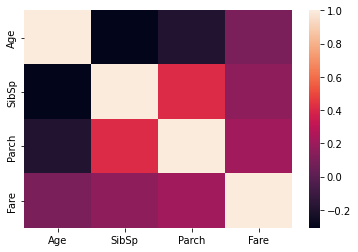

In [ ]:
import seaborn as sns
sns.heatmap(df_num.corr())
#Here we can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together.
# Next, let us compare survival rates across the numeric variables. This might reveal some interesting insights:

In [ ]:
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

#The average age of survivors is 28, so young people tend to survive more.
#People who paid higher fare rates were more likely to survive, more than double. This might be the people traveling in first-class. Thus the rich survived, which is kind of a sad story in this scenario.
#In the 3rd column, If you have parents, you had a higher chance of surviving. So the parents might’ve saved the kids before themselves, thus explaining the rates
#And if you are a child, and have sibCings, you have less of a chance of surviving
#RESHAPE (-1) one column
#3titou 1d whre he exapecting 2d

,Age,Fare,Parch,SibSp
Survived,,,,
No,30.626179,22.117887,0.329690,0.553734
Yes,28.343690,48.395408,0.464912,0.473684


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


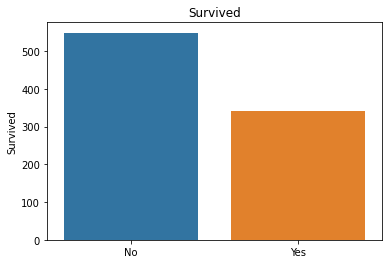

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


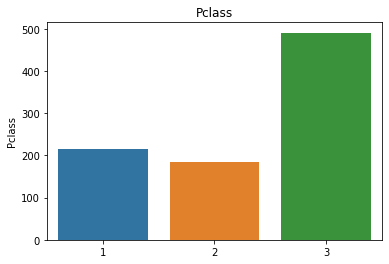

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


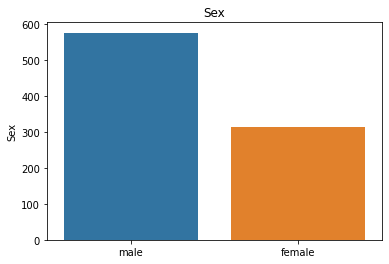

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


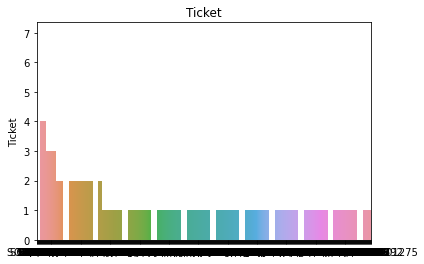

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


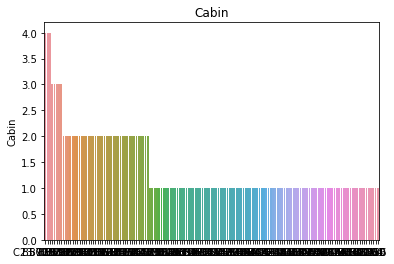

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


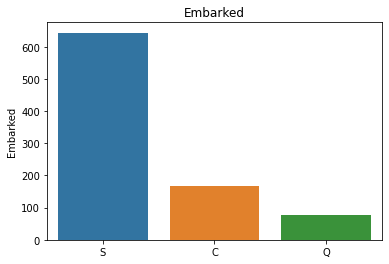

In [ ]:
 #Now we do a similar thing with our categorical variables:

for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [ ]:
#**The Ticket and Cabin graphs look very messy, we might have to feature engineer them! Other than that, the rest of the graphs tells us:**

#Survived: Most of the people died in the shipwreck,  only around 300 people survived.
#Pclass: The majority of the people traveling, had tickets to the 3rd class.
#Sex: There were more males than females aboard the ship, roughly double the amount.
#Embarked: Most of the passengers boarded the ship from Southampton.
##Now we will do something similar to the pivot table above, but with our categorical variables, and compare them against our dependent variable, which is if people survived:

In [ ]:
#Now we will do something similar to the pivot table above, but with our categorical variables, and compare them against our dependent variable, which is if people survived:

In [ ]:
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass: Here we can see a lot more people survived from the First class than the Second or the Third class, even though the total number of passengers in the First class was much much less than the Third class. Thus our previous assumption that the rich survived is confirmed here, which might be relevant to model building.
Sex: Most of the women survived, and the majority of the male died in the shipwreck. So it looks like the saying “Woman and children first” actually applied in this scenario.
Embarked: This doesn’t seem much relevant, maybe if someone was from “Cherbourg” had a higher chance of surviving.

Pclass      1   2    3
Survived              
No         80  97  372
Yes       136  87  119

Sex       female  male
Survived              
No            81   468
Yes          233   109

Embarked   C   Q    S
Survived             
No        75  47  427
Yes       93  30  217




```
Ordinal refers to quantities that have a natural ordering. ...
 Interval data is like ordinal except we can say the intervals between each value are equally split. The most common example is temperature in degrees Fahrenheit 

 With ordinal data you cannot state with certainty whether the intervals between each value are equal. For example, we often using rating scales (Likert questions). On a 10 point scale, the difference between a 9 and a 10 is not necessarily the same difference as the difference between a 6 and a 7. This is also an easy one to remember, ordinal sounds like order. 

 https://www.usablestats.com/lessons/noir
 
Ratio data is interval data with a natural zero point. For example, time is ratio since 0 time is meaningful. Degrees Kelvin has a 0 point (absolute 0) and the steps in both these scales have the same degree of magnitude.
```





```
Who Cares?
Where did this all come from you ask and why do we care?  Well, the short answer is, we should care most about identifying nominal data--which is categorical data. If it isn't nominal, then it's quantitative. So why all the fuss?  In the 1940's when behavioral science was in its infancy, there was much concern about trying to make the practice as legitimate as possible. Psychology and other Social and Behavioral Sciences are considered soft sciences as opposed to the hard sciences of Chemistry and Physics. It was thought that by applying some of the same thinking from the hard sciences, it would improve the legitimacy of these soft sciences--as well as the veracity of the claims made. 

One approach was to map types of scaling to more natural laws (something akin to the physical laws of gravity and motion). This classification system was proposed in 1946 by SS Stevens. In the article Stevens went so far as to say that you should only take averages on at least interval and ratio data. Nominal and Ordinal data should only be counted and described in frequency tables--no means and standard deviations. 

One of the more famous articles showing the fallacy of such rigid thinking was by an eminent statistician named Lord who in his article: "On the statistical Treatment of Football Numbers" showed how the means of nominal data can be meaningful too!

In practice, rating scales are ubiquitous in behavioral sciences and rarely have they been shown to have interval, much less ratio scales (what is the 0 point of customer satisfaction ?)

So means, standard deviations, t-tests, regressions and ANOVA are run daily and the results are published without much concern for these categories (to the chagrin of a few purists). What this classification system does remind us of is to not make interval and ratio claims about ordinal data. So if the average customer satisfaction on Product A is 4.0 and the Average on B is 2.0, we need to be careful in thinking the difference in satisfaction is twice. We can say there is a difference, but we're less sure if it's two times.

In summary, it's generally OK to take means and apply statistical tests to ordinal data, just be careful about making interval claims such as "twice as satisfied."```



****2.As a next step apply what you have learned in Data preprocessing to preprocess your data:    #find missing informations ****

correction: 

hichem :From where did you get this dataset? why it doesn't contain nulls and the columns Cabin, Embarked, Name and Ticket are Encoded??!!

The column Cabin is categorical, encoding its values and then compute the mean is ridiculous!!!


In [ ]:
df [['Embarked']].value_counts

<bound method DataFrame.value_counts of     Embarked
0          S
1          S
2          S
3          S
4          S
..       ...
886        C
887        C
888        S
889        S
890        S

[891 rows x 1 columns]>

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**3. replace them by the appropriate values.**

Start your work by inspecting the dataset, understand the data distribution in the columns that have missing values and then choose how you'll impute them. Also explain your choices, why the mean for the missing ages and not the median, was there another better approach?

In [ ]:
tc_data.groupby('Sex').mean()['Age'] #this column won't be unique after i used mode & mean age of male  ta3tih to female


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
tc_data.groupby('Sex').mean()['Age']
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0]) #this column won't be unique after i used mode & mean age of male  ta3tih to female

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.head(12)

NameError: ignored

In [ ]:
df[["Age",'Embarked','Cabin']].head(20)

,Age,Embarked,Cabin
0,28.000000,S,B96 B98
1,25.000000,S,F G73
2,20.000000,S,B96 B98
3,29.000000,S,B96 B98
4,31.000000,S,B71
5,37.000000,S,B96 B98
6,19.000000,S,B96 B98
7,1.000000,C,B96 B98
8,20.500000,S,B96 B98
9,42.000000,S,B96 B98


In [ ]:
df['Cabin'].unique()

array(['B96 B98', 'F G73', 'B71', 'C82', 'C93', 'B41', 'C95', 'B38',
       'C52', 'A32', 'C111', 'C2', 'E101', 'D17', 'B22', 'B3', 'C45',
       'B78', 'A31', 'C128', 'C30', 'A26', 'C22 C26', 'D15', 'T', 'C54',
       'C103', 'C125', 'D20', 'C78', 'E24', 'B82 B84', 'E12', 'D9', 'D28',
       'D19', 'G6', 'D48', 'C90', 'D56', 'E33', 'B86', 'F2', 'B77', 'B39',
       'F33', 'D26', 'C85', 'A34', 'C92', 'F G63', 'D45', 'D', 'C91',
       'B79', 'D21', 'C32', 'C83', 'C47', 'B58 B60', 'E38', 'B28', 'E58',
       'A16', 'B20', 'C126', 'E77', 'C65', 'C123', 'C68', 'B35', 'B5',
       'C46', 'E10', 'B51 B53 B55', 'E68', 'B49', 'B30', 'F E69',
       'D10 D12', 'B57 B59 B63 B66', 'D11', 'D36', 'C99', 'D7',
       'C23 C25 C27', 'C106', 'B19', 'C124', 'E8', 'A23', 'A10', 'E31',
       'B73', 'B18', 'E46', 'D50', 'F38', 'B37', 'A7', 'A5', 'E67', 'D33',
       'C118', 'C7', 'A36', 'C62 C64', 'E34', 'D6', 'A6', 'B101', 'E44',
       'C70', 'A20', 'E121', 'C87', 'C50', 'B4', 'C104', 'C148', 'A14',
 

**4.Transform categorical data using method of your choice(labelEncoder/one hot encoding)
****(using one of the two methods of transformation)**

The Cabin and Ticket are almost unique for each passenger, encoding them won't help in any type of analysis, for the rest like Survived, Sex and Embarked, it would be better to use one-hot encoding.


In [ ]:
df.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#4.Transform categorical data using method of your choice(labelEncoder/one hot encoding)
#(using the two methods of transformation)
#method 1 
from sklearn.preprocessing import OneHotEncoder

ohe= OneHotEncoder()
df[['Cabin']] =ohe.fit_transform(df['Cabin'].values) 
df[['Ticket']] =ohe.fit_transform(df['Ticket'].values)

#The Cabin and Ticket are almost unique for each passenger,
#encoding them won't help in any type of analysis, for the rest like Survived, Sex and Embarked, it would be better to use one-hot encoding.
df[['Survived']] =ohe.fit_transform(df['Survived'].values)
df[['Embarked']] =ohe.fit_transform(df['Embarked'].values)
df[['Sex']] =ohe.fit_transform(df[['Sex']])
df[['Name']] =ohe.fit_transform(df[['Name']])

TypeError: ignored

**** 5. Verify that your data is ready to be treated***


In [ ]:
df.isnull().sum()

In [ ]:
df[['Survived','Name','Sex','Ticket','Cabin','Embarked']].dtypes 




```
Ordinal refers to quantities that have a natural ordering. ...
 Interval data is like ordinal except we can say the intervals between each value are equally split. The most common example is temperature in degrees Fahrenheit 

 With ordinal data you cannot state with certainty whether the intervals between each value are equal. For example, we often using rating scales (Likert questions). On a 10 point scale, the difference between a 9 and a 10 is not necessarily the same difference as the difference between a 6 and a 7. This is also an easy one to remember, ordinal sounds like order. 

 https://www.usablestats.com/lessons/noir
 
Ratio data is interval data with a natural zero point. For example, time is ratio since 0 time is meaningful. Degrees Kelvin has a 0 point (absolute 0) and the steps in both these scales have the same degree of magnitude.
```





```
Who Cares?
Where did this all come from you ask and why do we care?  Well, the short answer is, we should care most about identifying nominal data--which is categorical data. If it isn't nominal, then it's quantitative. So why all the fuss?  In the 1940's when behavioral science was in its infancy, there was much concern about trying to make the practice as legitimate as possible. Psychology and other Social and Behavioral Sciences are considered soft sciences as opposed to the hard sciences of Chemistry and Physics. It was thought that by applying some of the same thinking from the hard sciences, it would improve the legitimacy of these soft sciences--as well as the veracity of the claims made. 

One approach was to map types of scaling to more natural laws (something akin to the physical laws of gravity and motion). This classification system was proposed in 1946 by SS Stevens. In the article Stevens went so far as to say that you should only take averages on at least interval and ratio data. Nominal and Ordinal data should only be counted and described in frequency tables--no means and standard deviations. 

One of the more famous articles showing the fallacy of such rigid thinking was by an eminent statistician named Lord who in his article: "On the statistical Treatment of Football Numbers" showed how the means of nominal data can be meaningful too!

In practice, rating scales are ubiquitous in behavioral sciences and rarely have they been shown to have interval, much less ratio scales (what is the 0 point of customer satisfaction ?)

So means, standard deviations, t-tests, regressions and ANOVA are run daily and the results are published without much concern for these categories (to the chagrin of a few purists). What this classification system does remind us of is to not make interval and ratio claims about ordinal data. So if the average customer satisfaction on Product A is 4.0 and the Average on B is 2.0, we need to be careful in thinking the difference in satisfaction is twice. We can say there is a difference, but we're less sure if it's two times.

In summary, it's generally OK to take means and apply statistical tests to ordinal data, just be careful about making interval claims such as "twice as satisfied."```

